# New Section

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

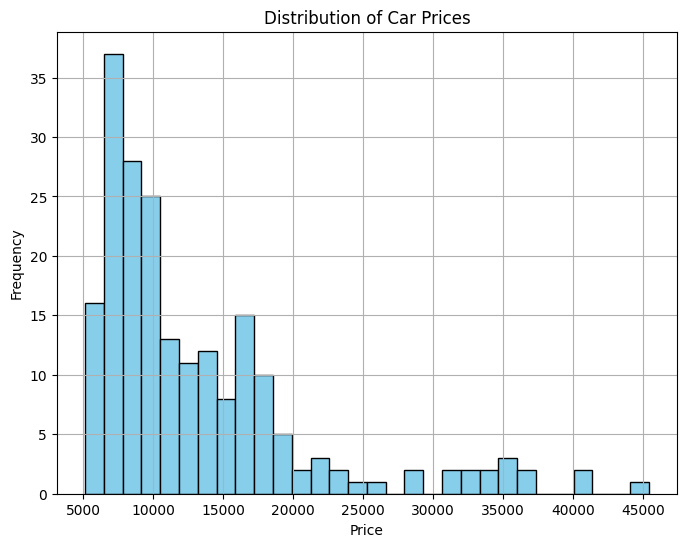

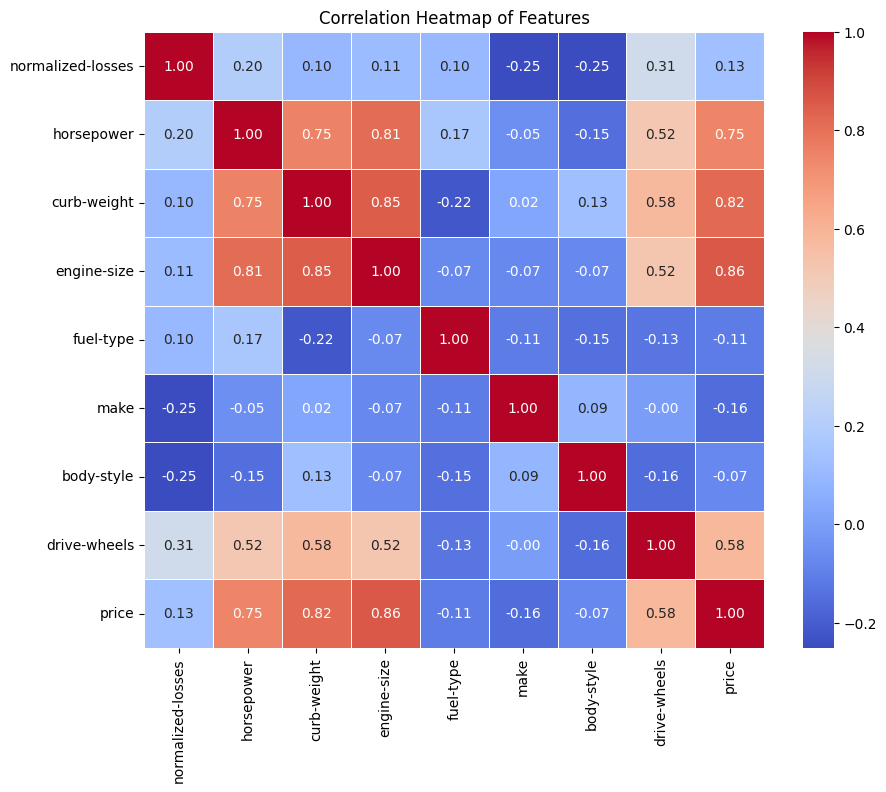

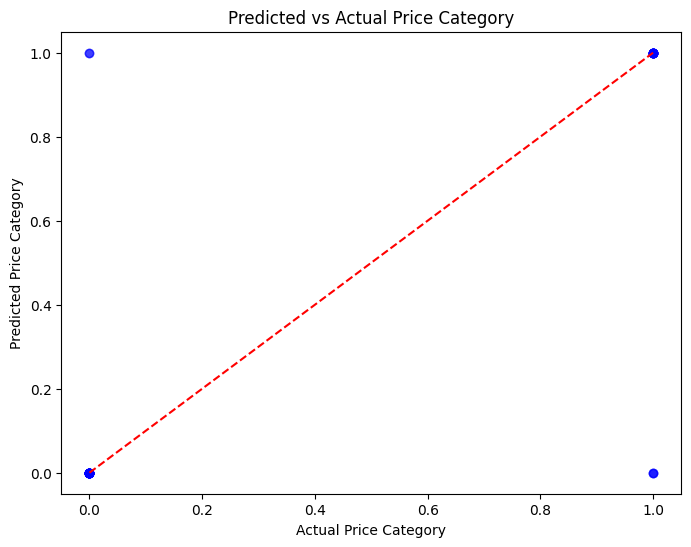

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the Automobile dataset (assuming the CSV file is in the current directory)
data = pd.read_csv('/content/Automobile_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Clean 'normalized-losses' column: Replace non-numeric values with NaN
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')

# Clean 'horsepower' column: Replace non-numeric values with NaN
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Clean 'price' column: Replace non-numeric values with NaN
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Fill missing values with the mean for numerical columns
data['normalized-losses'].fillna(data['normalized-losses'].mean(), inplace=True)
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)
data['curb-weight'].fillna(data['curb-weight'].mean(), inplace=True)
data['engine-size'].fillna(data['engine-size'].mean(), inplace=True)

# Handle missing 'price' column
data['price'].fillna(data['price'].median(), inplace=True)  # Fill with median for 'price'

# Convert categorical columns to numeric values using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'fuel-type' (gas, diesel) as 0 and 1
data['fuel-type'] = label_encoder.fit_transform(data['fuel-type'])

# Encoding 'make' (brands) as integer labels
data['make'] = label_encoder.fit_transform(data['make'])

# Encoding 'body-style' as integer labels
data['body-style'] = label_encoder.fit_transform(data['body-style'])

# Encoding 'drive-wheels' as integer labels
data['drive-wheels'] = label_encoder.fit_transform(data['drive-wheels'])

# Select features (independent variables) and target (dependent variable)
# Let's assume we want to predict the 'price' category (high/low) based on the car's attributes
# First, create a binary target variable based on price (e.g., if price > median, classify as 'high', else 'low')
median_price = data['price'].median()
data['price_category'] = data['price'].apply(lambda x: 1 if x > median_price else 0)

# Features (exclude the target and non-relevant columns)
X = data[['normalized-losses', 'horsepower', 'curb-weight', 'engine-size', 'fuel-type', 'make', 'body-style', 'drive-wheels']]
y = data['price_category']  # Target variable (0 = low price, 1 = high price)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# --- Plotting Section ---
# Plot 1: Distribution of 'price'
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Correlation Heatmap
correlation_matrix = data[['normalized-losses', 'horsepower', 'curb-weight', 'engine-size', 'fuel-type', 'make', 'body-style', 'drive-wheels', 'price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Plot 3: Predicted vs Actual 'price_category' for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45-degree line for perfect prediction
plt.title('Predicted vs Actual Price Category')
plt.xlabel('Actual Price Category')
plt.ylabel('Predicted Price Category')
plt.show()


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

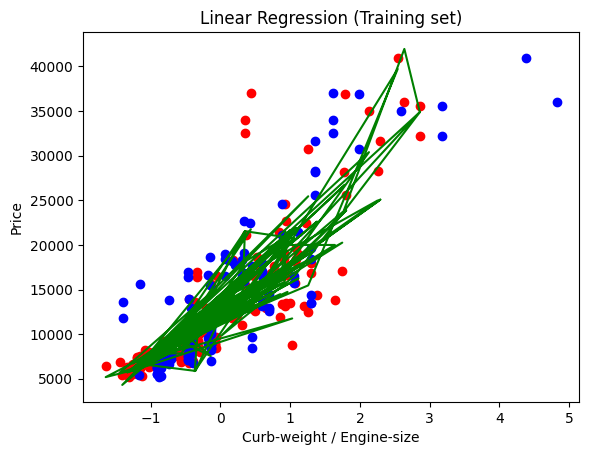

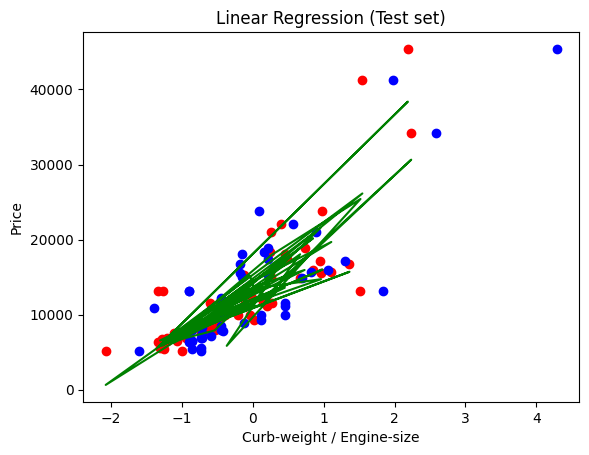

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset = pd.read_csv("/content/Automobile_data.csv")

# Preview the first few rows of the dataset
print(dataset.head())

# --- Data Preprocessing ---
# Handle missing values: Fill missing values with the mean for numerical columns
dataset['curb-weight'] = pd.to_numeric(dataset['curb-weight'], errors='coerce')
dataset['engine-size'] = pd.to_numeric(dataset['engine-size'], errors='coerce')
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Fill missing values with mean
dataset['curb-weight'].fillna(dataset['curb-weight'].mean(), inplace=True)
dataset['engine-size'].fillna(dataset['engine-size'].mean(), inplace=True)
dataset['price'].fillna(dataset['price'].mean(), inplace=True)

# Let's say we want to predict 'price' based on 'curb-weight' and 'engine-size'
X = dataset[['curb-weight', 'engine-size']].values  # Features
y = dataset['price'].values  # Target

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# --- Create Linear Regression Model ---
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # Train the model

# Predict on test set
y_pred = regressor.predict(X_test)

# --- Model Evaluation ---
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# --- Visualizing the Results for Training Set ---
plt.scatter(X_train[:, 0], y_train, color='red')
plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 0], regressor.predict(X_train), color='green')
plt.title('Linear Regression (Training set)')
plt.xlabel('Curb-weight / Engine-size')
plt.ylabel('Price')
plt.show()

# --- Visualizing the Results for Test Set ---
plt.scatter(X_test[:, 0], y_test, color='red')
plt.scatter(X_test[:, 1], y_test, color='blue')
plt.plot(X_test[:, 0], regressor.predict(X_test), color='green')
plt.title('Linear Regression (Test set)')
plt.xlabel('Curb-weight / Engine-size')
plt.ylabel('Price')
plt.show()
